In [147]:
import numpy as np
import pandas as pd

In [148]:
#fetch and read the csv file
data_path = 'dataset/heart.csv'
heart_df = pd.read_csv(data_path)
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [149]:
heart_df.shape

(303, 14)

In [150]:
heart_df.count()

age         303
sex         303
cp          303
trestbps    303
chol        303
fbs         303
restecg     303
thalach     303
exang       303
oldpeak     303
slope       303
ca          303
thal        303
target      303
dtype: int64

In [151]:
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [152]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [153]:
#check for any none values
heart_df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

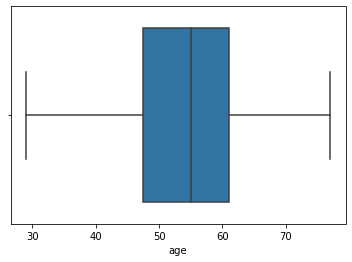

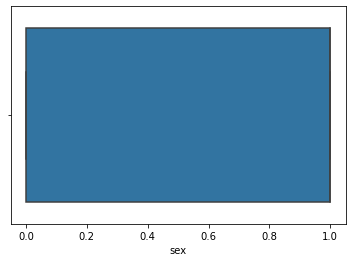

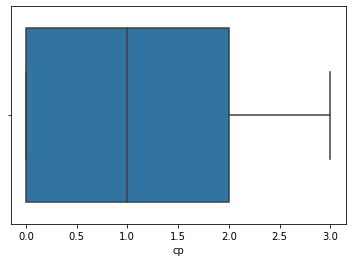

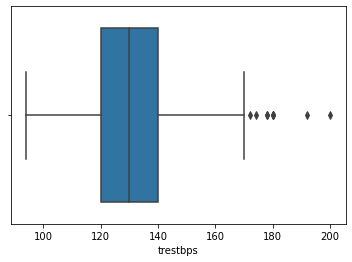

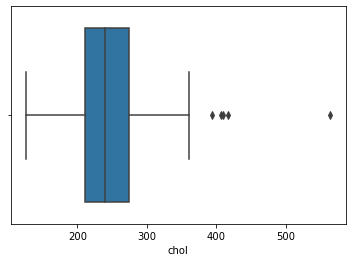

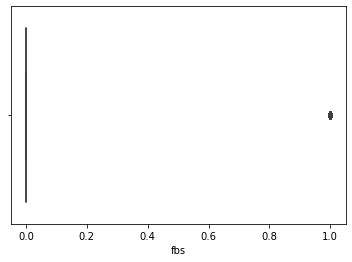

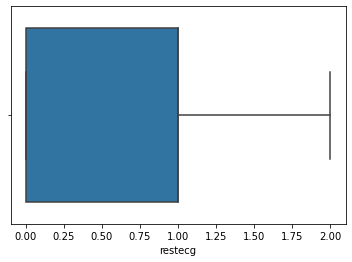

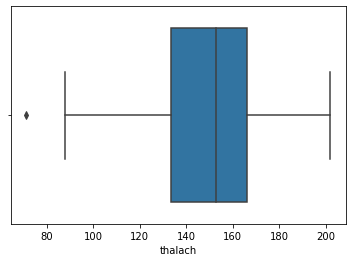

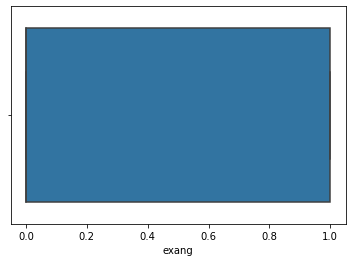

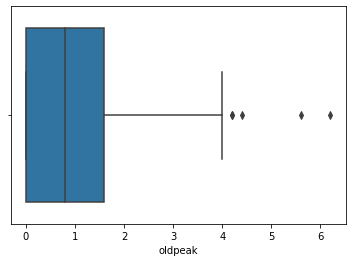

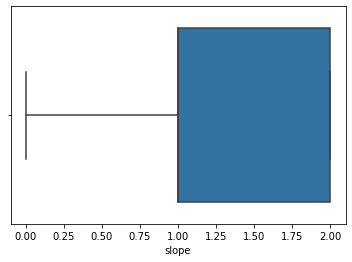

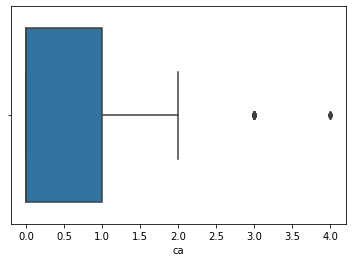

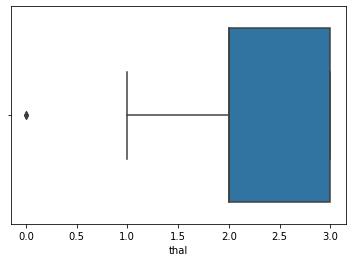

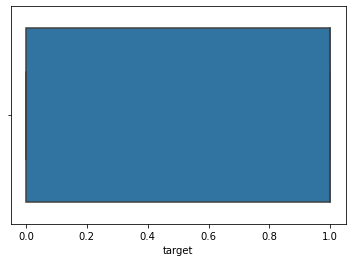

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns

#box plot for all columns
for i in heart_df.columns:
    sns.boxplot(x=heart_df[i])
    plt.show()

In [155]:
#create a copy for visualization
heart_df_copy = heart_df.copy()

In [156]:
heart_df_copy.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<AxesSubplot:xlabel='target', ylabel='count'>

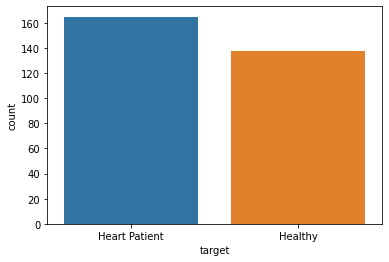

In [157]:
#comparing the number healthy vs number of heart patients
heart_df_copy.target = heart_df_copy.target.map({0:'Healthy',1:'Heart Patient'})
sns.countplot(x="target", data=heart_df_copy)

<AxesSubplot:xlabel='sex', ylabel='count'>

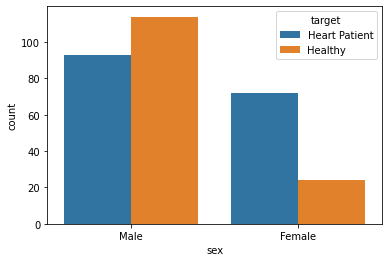

In [158]:
#comparing number of male vs female
heart_df_copy.sex= heart_df_copy.sex.map({0:'Female',1:'Male'})
sns.countplot(x="sex", data = heart_df_copy, hue= heart_df_copy.target)

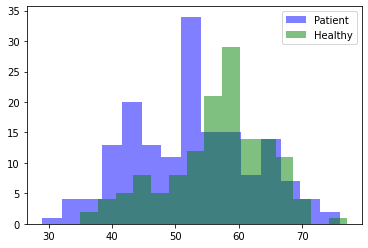

In [159]:
#comparing age with health
plt.hist(heart_df_copy[heart_df_copy.target=='Heart Patient']['age'],color='b',alpha=0.5,bins=15,label='Patient')
plt.hist(heart_df_copy[heart_df_copy.target=='Healthy']['age'],color='g',alpha=0.5,bins=15,label='Healthy')
plt.legend()
plt.show()

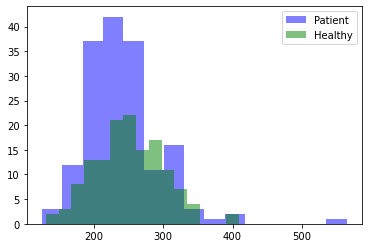

In [160]:
#comparing cholestrol with health
plt.hist(heart_df_copy[heart_df_copy.target=='Heart Patient']['chol'],color='b',alpha=0.5,bins=15,label='Patient')
plt.hist(heart_df_copy[heart_df_copy.target=='Healthy']['chol'],color='g',alpha=0.5,bins=15,label='Healthy')
plt.legend()
plt.show()

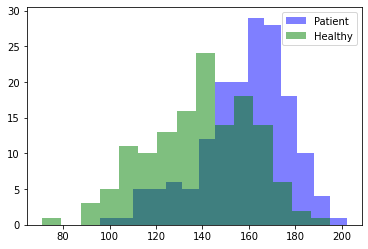

In [161]:
#comparing heart rate with health
plt.hist(heart_df_copy[heart_df_copy.target=='Heart Patient']['thalach'],color='b',alpha=0.5,bins=15,label='Patient')
plt.hist(heart_df_copy[heart_df_copy.target=='Healthy']['thalach'],color='g',alpha=0.5,bins=15,label='Healthy')
plt.legend()
plt.show()

In [162]:
#Divide the data frame into input and output
X = heart_df.drop('target', axis=1)
y = heart_df['target']

In [163]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [164]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [165]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [166]:
#defining the sequential model for binary classification
model = keras.Sequential()

In [167]:
model.add(layers.Dense(11,activation='relu',input_dim=13))
model.add(layers.Dense(1,activation='sigmoid'))

In [ ]:
#compile and fit the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X, y, validation_split=0.22, epochs=300)

Epoch 1/300
8/8 [==============================] - 2s 102ms/step - loss: 51.0997 - accuracy: 0.2758 - val_loss: 1.9447e-18 - val_accuracy: 1.0000
Epoch 2/300
8/8 [==============================] - 0s 12ms/step - loss: 42.6608 - accuracy: 0.3197 - val_loss: 2.6505e-16 - val_accuracy: 1.0000
Epoch 3/300
8/8 [==============================] - 0s 12ms/step - loss: 37.1745 - accuracy: 0.3175 - val_loss: 2.9649e-14 - val_accuracy: 1.0000
Epoch 4/300
8/8 [==============================] - 0s 12ms/step - loss: 33.9028 - accuracy: 0.2782 - val_loss: 4.9070e-12 - val_accuracy: 1.0000
Epoch 5/300
8/8 [==============================] - 0s 12ms/step - loss: 26.9896 - accuracy: 0.3093 - val_loss: 1.2287e-09 - val_accuracy: 1.0000
Epoch 6/300
8/8 [==============================] - 0s 10ms/step - loss: 21.1293 - accuracy: 0.3182 - val_loss: 3.4295e-07 - val_accuracy: 1.0000
Epoch 7/300
8/8 [==============================] - 0s 11ms/step - loss: 16.4513 - accuracy: 0.2732 - val_loss: 1.2719e-04 - val_a

Epoch 59/300
8/8 [==============================] - 0s 12ms/step - loss: 0.4891 - accuracy: 0.7316 - val_loss: 0.8870 - val_accuracy: 0.5075
Epoch 60/300
8/8 [==============================] - 0s 14ms/step - loss: 0.5041 - accuracy: 0.7443 - val_loss: 0.8342 - val_accuracy: 0.5224
Epoch 61/300
8/8 [==============================] - 0s 11ms/step - loss: 0.4998 - accuracy: 0.7789 - val_loss: 0.9962 - val_accuracy: 0.4478
Epoch 62/300
8/8 [==============================] - 0s 13ms/step - loss: 0.4600 - accuracy: 0.7602 - val_loss: 0.7959 - val_accuracy: 0.5373
Epoch 63/300
8/8 [==============================] - 0s 12ms/step - loss: 0.4393 - accuracy: 0.7828 - val_loss: 0.8993 - val_accuracy: 0.4925
Epoch 64/300
8/8 [==============================] - 0s 11ms/step - loss: 0.4716 - accuracy: 0.7562 - val_loss: 0.9039 - val_accuracy: 0.4925
Epoch 65/300
8/8 [==============================] - 0s 13ms/step - loss: 0.4670 - accuracy: 0.7587 - val_loss: 0.8480 - val_accuracy: 0.5224
Epoch 66/300


Epoch 117/300
8/8 [==============================] - 0s 12ms/step - loss: 0.4113 - accuracy: 0.8317 - val_loss: 0.8473 - val_accuracy: 0.5224
Epoch 118/300
8/8 [==============================] - 0s 13ms/step - loss: 0.3390 - accuracy: 0.8791 - val_loss: 0.6751 - val_accuracy: 0.5672
Epoch 119/300
8/8 [==============================] - 0s 13ms/step - loss: 0.3582 - accuracy: 0.8650 - val_loss: 0.7751 - val_accuracy: 0.5373
Epoch 120/300
8/8 [==============================] - 0s 12ms/step - loss: 0.3819 - accuracy: 0.8515 - val_loss: 0.9491 - val_accuracy: 0.4776
Epoch 121/300
8/8 [==============================] - 0s 12ms/step - loss: 0.3727 - accuracy: 0.8359 - val_loss: 0.6898 - val_accuracy: 0.5672
Epoch 122/300
8/8 [==============================] - 0s 12ms/step - loss: 0.3791 - accuracy: 0.8677 - val_loss: 0.8116 - val_accuracy: 0.5373
Epoch 123/300
8/8 [==============================] - 0s 12ms/step - loss: 0.3873 - accuracy: 0.8224 - val_loss: 0.9351 - val_accuracy: 0.5075
Epoch 

8/8 [==============================] - 0s 12ms/step - loss: 0.2696 - accuracy: 0.8967 - val_loss: 0.7142 - val_accuracy: 0.5970
Epoch 175/300
8/8 [==============================] - 0s 12ms/step - loss: 0.3458 - accuracy: 0.8686 - val_loss: 0.7853 - val_accuracy: 0.5672
Epoch 176/300
8/8 [==============================] - 0s 11ms/step - loss: 0.3560 - accuracy: 0.8409 - val_loss: 0.7595 - val_accuracy: 0.5672
Epoch 177/300
8/8 [==============================] - 0s 10ms/step - loss: 0.3520 - accuracy: 0.8514 - val_loss: 0.8119 - val_accuracy: 0.5373
Epoch 178/300
8/8 [==============================] - 0s 11ms/step - loss: 0.3397 - accuracy: 0.8766 - val_loss: 0.7920 - val_accuracy: 0.5522
Epoch 179/300
8/8 [==============================] - 0s 11ms/step - loss: 0.3283 - accuracy: 0.8503 - val_loss: 0.8100 - val_accuracy: 0.5373
Epoch 180/300
8/8 [==============================] - 0s 14ms/step - loss: 0.3052 - accuracy: 0.8958 - val_loss: 0.7303 - val_accuracy: 0.5970
Epoch 181/300
8/8 [=

In [ ]:
#plot loss vs epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('no of epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [ ]:
#plot accuracy vs epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('no of epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [ ]:
import numpy as np
from numpy import array

#input for 13 features
Xnew = np.array([[67,1,0,125,254,1,1,163,0,0.2,1,2,3]])

#Xnew = np.array([[18,1,0,130,253,0,1,144,1,1.4,2,1,3]])

#convert into numpy array
Xnew = np.array(Xnew, dtype=np.float64)

#making the prediction
Ynew = (model.predict(Xnew)>0.5).astype("int32")

print(Ynew[0])